In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
data1, c1  = df.Data1()
data2, c2 = df.Data2()

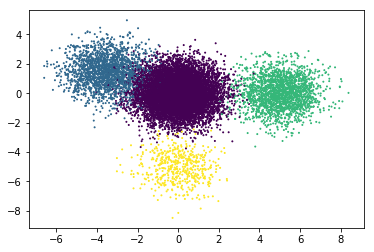

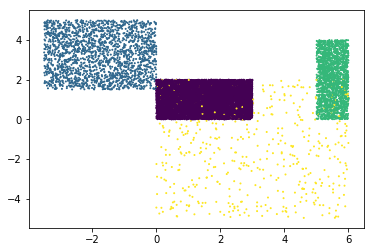

In [2]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.show()

In [60]:
def ComputeBIC(kmeans, data):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    print(cl_var)
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    BIC = (np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return(BIC)
    
    


In [61]:
ks = range(1,10)
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks]
BIC = [ComputeBIC(kmeansi,data) for kmeansi in KMeans]


[4.15213397]
[2.26980353]
[1.35148639]
[0.94353946]
[0.73729416]
[0.59624175]
[0.52544926]
[0.48225669]
[0.44138212]


[61805.115283407045, 59195.998834743055, 57728.39094136318, 54682.29684663543, 57336.924272282035, 58058.652670316376, 59045.96260120779, 59555.13971490615, 59985.21245830075]


Text(0, 0.5, 'value for BIC')

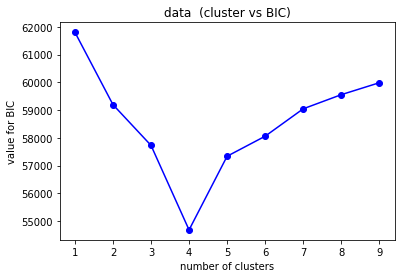

In [62]:
print(BIC)
plt.plot(ks,BIC,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")


In [4]:
data2

array([[[[ 0.2361569 ,  0.63803787],
         [-3.06618577,  3.64443654],
         [ 5.59338659,  0.5296099 ],
         [ 5.15630584, -2.41908611]],

        [[ 2.69308218,  1.70574726],
         [-1.481905  ,  1.5329178 ],
         [ 5.5618692 ,  3.95638906],
         [ 0.68706977, -2.26551618]]],


       [[[ 2.76256946,  1.33331632],
         [-2.45903908,  4.0197077 ],
         [ 5.00811973,  0.15362208],
         [ 4.2244124 ,  1.49272207]],

        [[ 2.676709  ,  1.47167851],
         [-3.08324426,  2.19042772],
         [ 5.8243961 ,  1.74007178],
         [ 5.96963491,  0.32365153]]],


       [[[ 0.0081475 ,  1.76856194],
         [-3.28927346,  2.55460188],
         [ 5.55569269,  0.14332803],
         [ 1.44599786, -3.79577733]],

        [[ 2.63932321,  0.24210869],
         [-2.10468748,  4.11599335],
         [ 5.52492362,  0.60065688],
         [ 0.2606576 , -1.63226401]]],


       ...,


       [[[ 2.57995367,  0.40917761],
         [-0.74940045,  4.16903439],
      